In [5]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from spectralwaste.dataset import SpectralWasteDataset
from spectralwaste import utils

In [6]:
# Load dataset

dataset = SpectralWasteDataset('../data/dataset', '../data/metadata/annotations_rgb_iros2024.json', '../data/metadata/splits_iros2024.json')
images = dataset.get_labeled_images()

In [7]:
# Annotations statistics

counters = dict()
for image in dataset.get_labeled_images():
    for ann in image.annotations:
        counters[ann['category']] = counters.get(ann['category'], 0) + 1

print('#labeled images:', len(images))
print('#unlabeled images:', len(dataset.get_images()) - len(images))
print('#objects:', sum(counters.values()))
print('#object per category:', counters)

counters = dict()
for image in dataset.get_labeled_images():
    counters[image.split] = counters.get(image.split, 0) + 1

print('#images per split:', counters)

#labeled images: 852
#unlabeled images: 6801
#objects: 2059
#object per category: {'film': 339, 'basket': 300, 'bag': 954, 'video_tape': 287, 'filament': 111, 'cardboard': 68}
#images per split: {'train': 514, 'val': 167, 'test': 171}


(-0.5, 1183.5, 1199.5, -0.5)

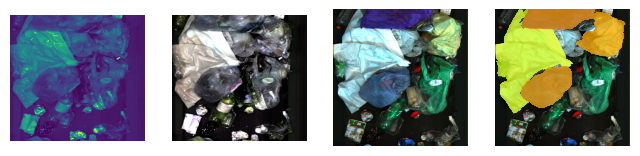

In [8]:
# Plot an image

image = dataset.get_image('20220928_01_112458')
rgb = image.read_rgb()
hyper = image.read_hyper()
labels = image.get_semantic_labels()

plt.figure(figsize=(8, 2))

# One hyper channel
plt.subplot(141)
plt.imshow(hyper[:, :, 150])
plt.axis('off')

# False color hyper image
plt.subplot(142)
plt.imshow(utils.image_processing.false_color(hyper))
plt.axis('off')

# RGB
plt.subplot(143)
plt.imshow(rgb)
plt.axis('off')

# RGB with labels
plt.subplot(144)
utils.plotting.plot_labels(rgb, labels, dataset.get_palette())
plt.axis('off')

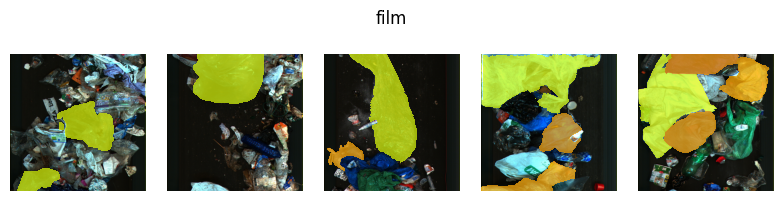

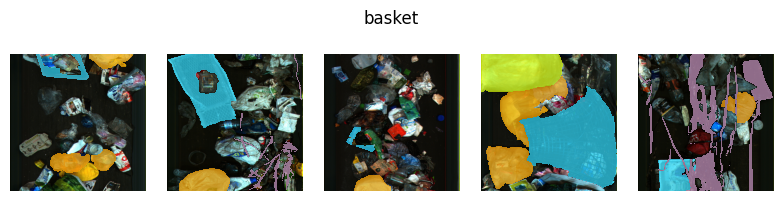

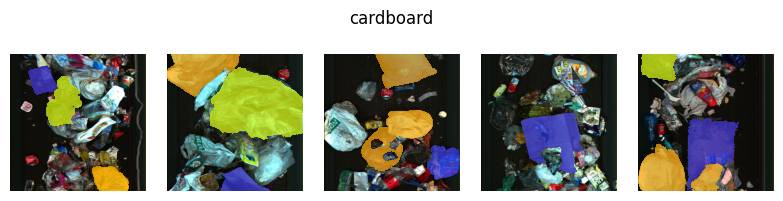

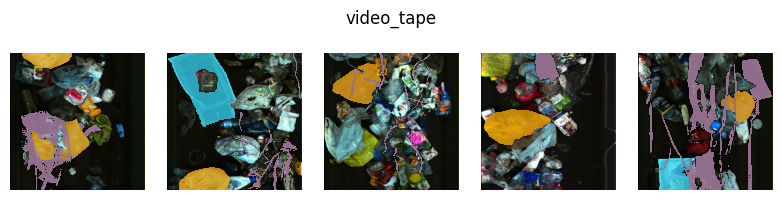

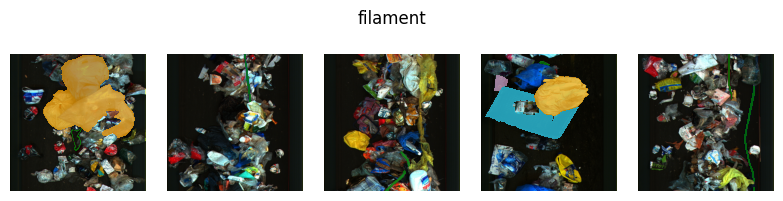

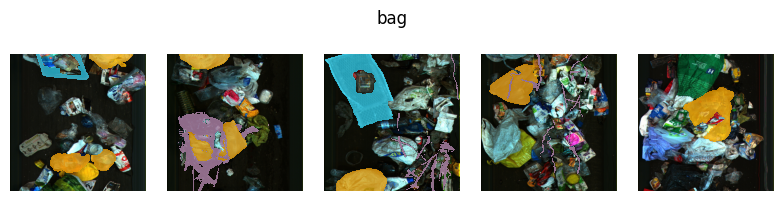

In [9]:
# Show some images of each category

for cat in dataset.categories[1:]:
    fig, axs = plt.subplots(1, 5, figsize=(8, 2))
    images = dataset.get_labeled_images(lambda img: cat in img.image_categories)
    fig.suptitle(cat)
    for i, img in enumerate(images[:5]):
        rgb = img.read_rgb()
        labels = img.get_semantic_labels()
        utils.plotting.plot_labels(rgb, labels, dataset.get_palette(), ax=axs[i])
    fig.tight_layout()